# Planetary Stewardship based on EPA Indicators
by Asad Nabi

Inspired by Cornell’s Introductory Environment and Ecology course (BIOEE 1610), I created this project to leverage Data Science and ML to gleam insight on environmental trends and contributors to global warming based on EPA indicators.

##### This project is written in Python (best opened in a notebook - ipynb format)

This project will have four major focuses and will touch upon 5 major Climate Change indicators as described by the EPA - (https://www.epa.gov/climate-indicators)

1) Weather and Climate

2) Oceans

3) Greenhouse Gases

4) Ecosystem

5) Health and Society (Human Development)

It will also touch upon the effect of Agriculture Intensification and Meat Farming which is a major contributor to CO2 and Methane emissions and Nitrogen pollution



# Visualization of Temperature Anomalities

We will be using NASA GISTEMP v4 dataset that contains a comprehensive overview of climate variability and change over time.

In [1]:
#Import Associated Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr
import seaborn as sns
from matplotlib import style

%matplotlib inline


In [2]:
xr_df = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc')
xr_df

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, nv: 2, time: 1708)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2022-04-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2022-05-11 09:46:13 by SBBX_to_nc 2.0 - ILAND=1200,...

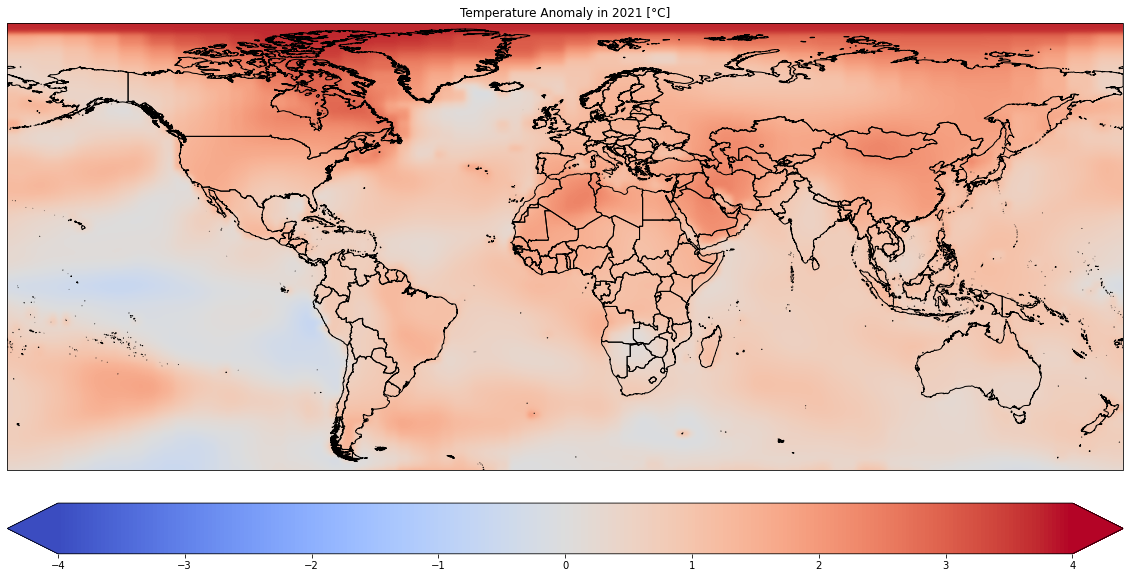

In [3]:
climate = xr_df.resample(time='Y').mean()
anomaly = climate['tempanomaly']

#Creating an image of the global temperature anomaly for a given year.

#Creating the colorbar
colarbar = {
    'orientation':'horizontal',
    'fraction': 0.45,
    'pad': 0.03,
    'extend':'both'
}

# Creating a plot and subplot (colarbar) of temperature anonmallies over the world map
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-150, 150, -55, 85])

timeof2021 = -2
date =  pd.to_datetime(anomaly.isel(time=timeof2021)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")

anomaly.isel(time=timeof2021).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm',
               cbar_kwargs=colarbar, interpolation='Gaussian')

plt.show()

# Visualizing Land Average Temperature and Winter Temperature Change over Time

In [4]:
#Manipulating global temperature data such that it gives us the last 70 years 
#where the trend was the most catastrophic

df5 = pd.read_csv("GlobalTemperatures.csv")
globtemps2 = df5
globtemps2['Year'] = 'NaN'
globtemps2['Year (int)'] = 'NaN'

for i in range(len(df5)):
    temp = df5['dt'].iloc[i][:4]
    globtemps2['Year'].iloc[i] = df5['dt'].iloc[i][:4]
    globtemps2['Year (int)'][i] = int(temp)


globtempsmodeldf = globtemps2.iloc[2400:]
globtempsmodeldf.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-4-d93b765d103f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globtemps2['Year (int)'][i] = int(temp)


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Year (int)
2400,1950-01-01,2.008,0.173,7.611,0.207,-3.622,0.236,13.311,0.095,1950,1950
2401,1950-02-01,2.721,0.182,8.475,0.209,-3.013,0.217,13.554,0.101,1950,1950
2402,1950-03-01,5.247,0.150,11.173,0.158,-0.693,0.200,14.296,0.097,1950,1950
2403,1950-04-01,8.123,0.192,14.157,0.216,2.043,0.280,15.093,0.102,1950,1950
2404,1950-05-01,11.297,0.217,17.252,0.259,5.421,0.286,16.033,0.106,1950,1950


In [5]:
#seperate dataset that gives us a year to year overview of temperature recorded at the Dec of the year
newdf5 = df5.loc[df5['dt'] == '1965-12-01']
newdf5['Year'] = '1965'
newdf5['Year (int)'] = 1965

for i in range (1,53):
    newdf5 = newdf5.append((df5.loc[df5['dt'] == str(1965 + i)+'-12-01']),ignore_index = True)
    newdf5["Year"][i] = str(1965 + i)
    newdf5['Year (int)'][i] = 1965 + i

globtemps = newdf5
globtemps.head(55)

<ipython-input-5-e472bc702952>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf5['Year'] = '1965'
<ipython-input-5-e472bc702952>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf5['Year (int)'] = 1965
<ipython-input-5-e472bc702952>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf5["Year"][i] = str(1965 + i)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Year (int)
0,1965-12-01,3.766,0.099,9.235,0.109,-1.543,0.066,13.775,0.062,1965,1965
1,1966-12-01,3.382,0.052,8.758,0.084,-1.927,0.130,13.683,0.057,1966,1966
2,1967-12-01,3.915,0.050,9.279,0.056,-1.420,0.114,13.730,0.050,1967,1967
3,1968-12-01,3.240,0.053,8.551,0.135,-2.116,0.103,13.791,0.050,1968,1968
4,1969-12-01,4.210,0.086,9.587,0.103,-1.139,0.113,13.993,0.054,1969,1969
5,1970-12-01,3.521,0.050,8.941,0.094,-1.829,0.084,13.707,0.048,1970,1970
6,1971-12-01,3.867,0.065,9.228,0.118,-1.439,0.126,13.660,0.051,1971,1971
7,1972-12-01,3.778,0.072,9.182,0.181,-1.492,0.084,13.951,0.050,1972,1972
8,1973-12-01,3.832,0.082,9.292,0.111,-1.514,0.073,13.711,0.051,1973,1973
9,1974-12-01,3.550,0.127,8.739,0.155,-1.522,0.126,13.656,0.057,1974,1974


In [6]:
#transorming change in time to applicable dates

globtemps['dt'] = pd.to_datetime(globtemps['dt'])
globtemps.set_index('dt',inplace=True)
globtemps.index

DatetimeIndex(['1965-12-01', '1966-12-01', '1967-12-01', '1968-12-01',
               '1969-12-01', '1970-12-01', '1971-12-01', '1972-12-01',
               '1973-12-01', '1974-12-01', '1975-12-01', '1976-12-01',
               '1977-12-01', '1978-12-01', '1979-12-01', '1980-12-01',
               '1981-12-01', '1982-12-01', '1983-12-01', '1984-12-01',
               '1985-12-01', '1986-12-01', '1987-12-01', '1988-12-01',
               '1989-12-01', '1990-12-01', '1991-12-01', '1992-12-01',
               '1993-12-01', '1994-12-01', '1995-12-01', '1996-12-01',
               '1997-12-01', '1998-12-01', '1999-12-01', '2000-12-01',
               '2001-12-01', '2002-12-01', '2003-12-01', '2004-12-01',
               '2005-12-01', '2006-12-01', '2007-12-01', '2008-12-01',
               '2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
               '2013-12-01', '2014-12-01', '2015-12-01'],
              dtype='datetime64[ns]', name='dt', freq=None)

Text(0.5, 1.0, 'Monthly Increase of Global Average Temperature since 1750')

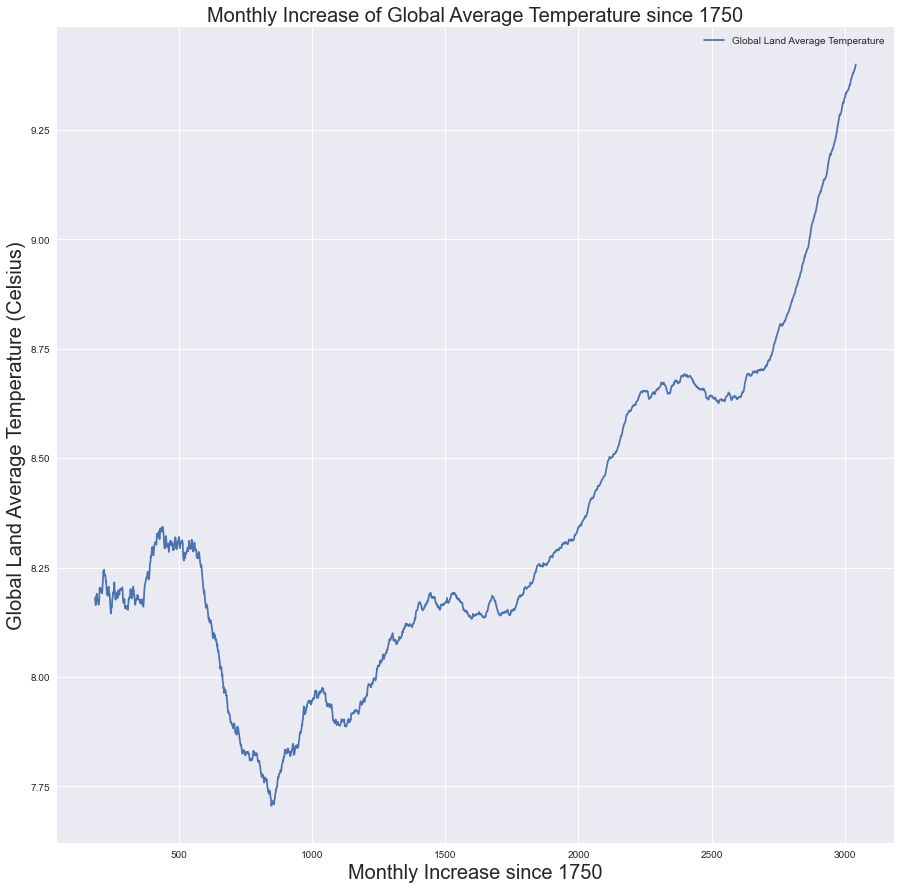

In [7]:
#Using rollingmean to create a more accurate line over time series
rolling2 = df5['LandAverageTemperature'].rolling(window=300, center = True).mean()

#Visualization of Monthly increase since 1950
plt.rc('lines', lw = 2)

plt.figure(figsize=(15,15))
style.use('seaborn')
rolling2.plot(label='Global Land Average Temperature')
plt.legend()
plt.xlabel('Monthly Increase since 1750', size = 20)
plt.ylabel('Global Land Average Temperature (Celsius)', size = 20)
plt.title('Monthly Increase of Global Average Temperature since 1750', size = 20)

Text(0.5, 1.0, 'Global Land Winter Temperatures since 1965')

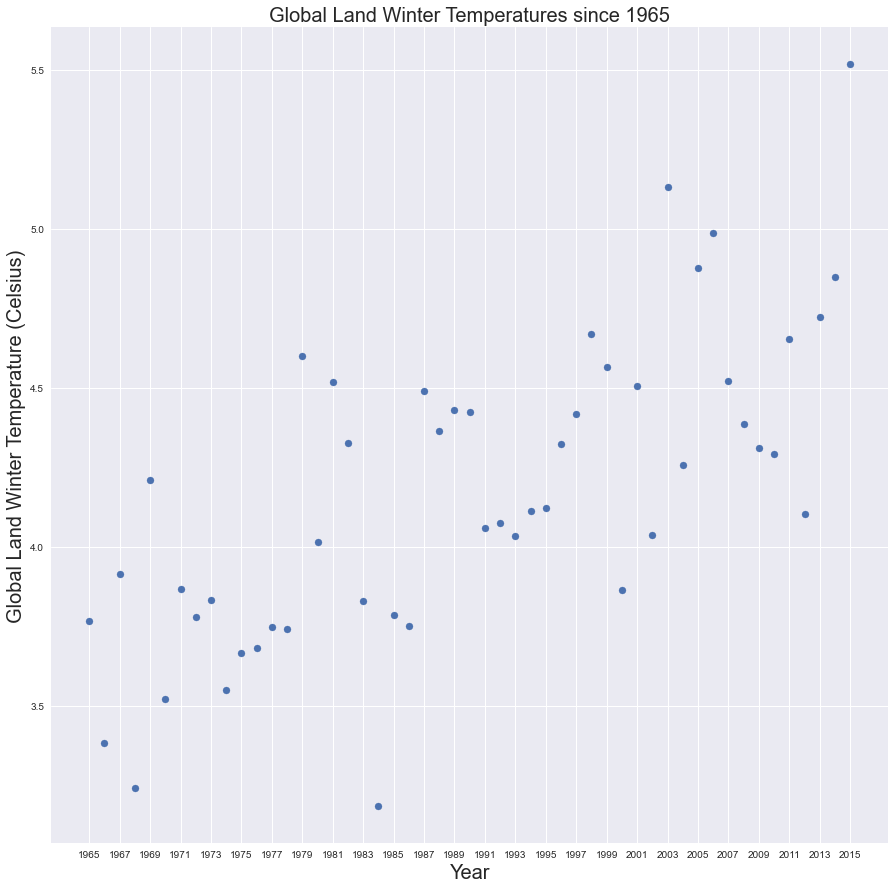

In [8]:
# Number of xticks on axis
ticks1 = []
i = 0 
while len(ticks1) < 26:
    if i % 2 == 0:
        ticks1.append(i)
    i += 1

# We will be visualizing a scatterplot of the Global Land Average Temperature since 1965
# This is referencing the LAST MONTH of the year (Dec) so the temperature will be lower but the trend is present

plt.figure(figsize=(15,15))
plt.scatter(globtemps['Year'],globtemps['LandAverageTemperature'],cmap = 'coolwarm')
plt.xticks(ticks1)
plt.xlabel('Year', size = 20)
plt.ylabel('Global Land Winter Temperature (Celsius)',size = 20)
plt.title('Global Land Winter Temperatures since 1965',size = 20)

Text(0.5, 1.0, 'Global Land Winter Temperature Change since 1965')

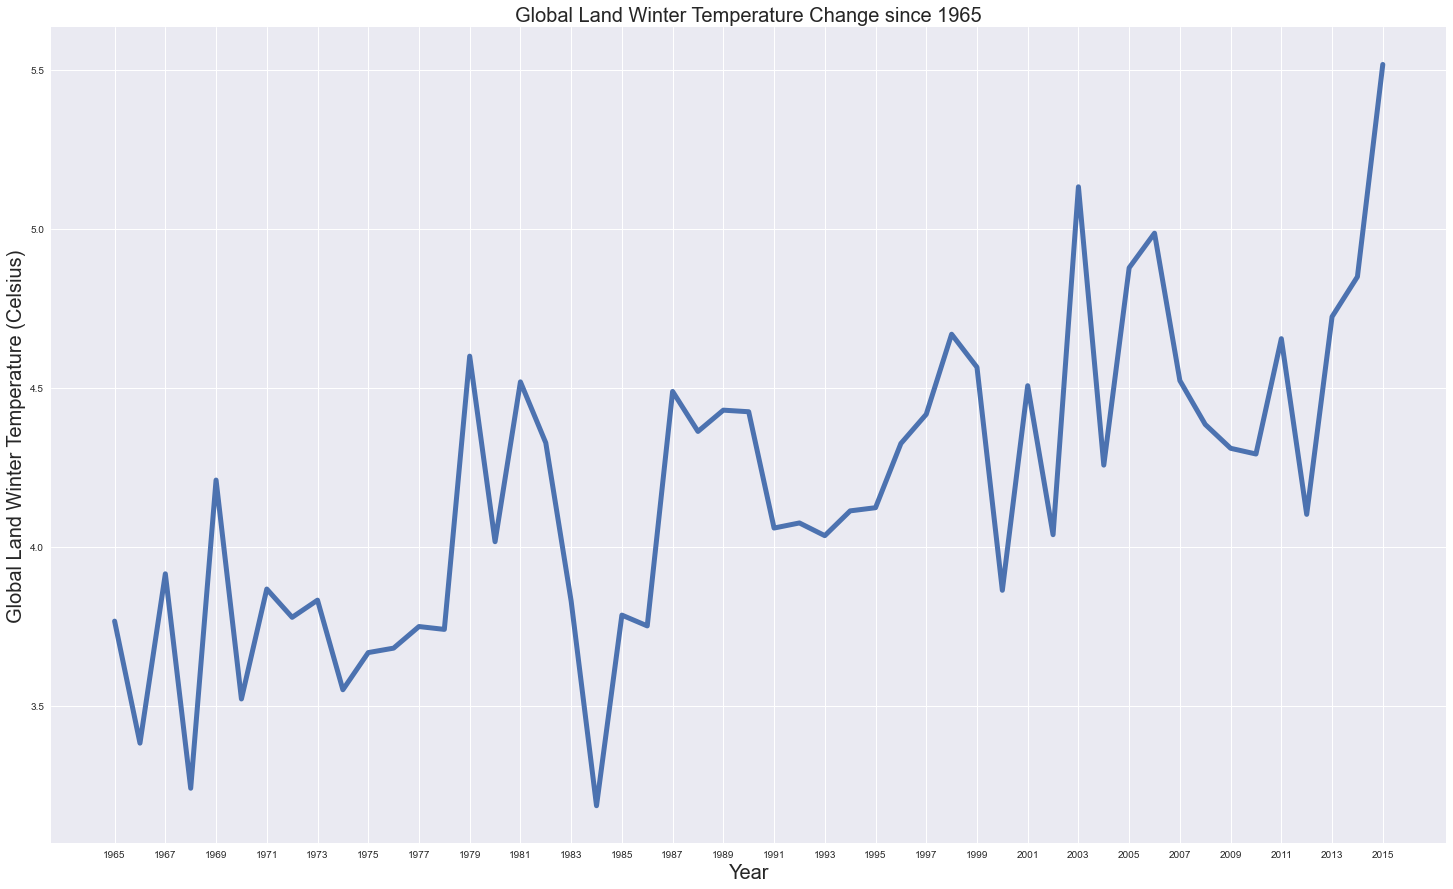

In [9]:
# Using rollingmean for a more succinct and pronounced change
rolling = globtemps['Year'].rolling(window = 3, center = True).mean()

# We will be visualizing the change in Global Land Average Temperature since 1965
# This is referencing the LAST MONTH of the year (Dec) so the temperature will be lower but the trend is present
plt.figure(figsize=(25,15))
sns.lineplot(x = 'Year', y = 'LandAverageTemperature', data = globtemps,estimator=None,
    linewidth=5)
plt.xticks(ticks1)
plt.xlabel('Year',size = 20)
plt.ylabel('Global Land Winter Temperature (Celsius)',size = 20)
plt.title('Global Land Winter Temperature Change since 1965',size = 20)

In [10]:
#Libraries for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
#Linear Regression as an algorthmic predictor for Global Land Average Temperature (celsius)
def LinearReg(features,target,size,state,accuracy):
    xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size = size,random_state = state)
    model = LinearRegression()
    model.fit(xtrain,ytrain)
    prediction = model.predict(xtest)
    if accuracy == True:
        #accuracy
        modelscore = model.score(xtest,ytest)
        #DataFrame that compares true vs predicted
        modelframe = pd.DataFrame({'True Land Temperature':ytest, 
                                   'Model-predicted Land Temperature':prediction, 
                                   'Year':xtest['Year (int)']})
        print('Model Accuracy: ' + str(modelscore))
        return model,prediction,modelframe
    else:
        return model,prediction

#features of interest
tempfeatures = globtemps[['Year (int)','LandAndOceanAverageTemperature',
                          'LandAndOceanAverageTemperatureUncertainty']]
#target
temptarget = globtemps['LandAverageTemperature']

gtmodel, gtprediction, gtmodelframe = LinearReg(tempfeatures,temptarget,.4,42,True)

Model Accuracy: 0.824792884459886


In [12]:
#DataFrame that compares true vs predicted
gtmodelframe.head()

,True Land Temperature,Model-predicted Land Temperature,Year
dt,,,
2008-12-01,4.385,4.407809,2008
2005-12-01,4.878,4.726164,2005
2011-12-01,4.655,4.457469,2011
1977-12-01,3.749,3.736156,1977
1989-12-01,4.430,4.270244,1989


In [13]:
# LinearRegression Equation
B1 = gtmodel.coef_[0]
Year = 2008
B2 = gtmodel.coef_[1]
LandAndOceanAverageTemperature = globtemps['LandAndOceanAverageTemperature'].mean()
B3 = gtmodel.coef_[2]
LandAndOceanAverageTemperatureUncertainty = globtemps['LandAndOceanAverageTemperatureUncertainty'].mean()
k = gtmodel.intercept_

# Uses LinearRegression and sklearn predict function to see future trends
def AverageTemperature(Year, LOAvgTemp = globtemps['LandAndOceanAverageTemperature'].mean() ,LOAvgTempU = globtemps['LandAndOceanAverageTemperatureUncertainty'].mean()):
    return round((gtmodel.predict([[Year,LOAvgTemp, LOAvgTempU]])[0]), 4)

def YearOfTemperature(Temp):
    LandAndOceanAverageTemperature = globtemps['LandAndOceanAverageTemperature'].mean()
    LandAndOceanAverageTemperatureUncertainty = globtemps['LandAndOceanAverageTemperatureUncertainty'].mean()
    return round(((Temp - gtmodel.coef_[1]*LandAndOceanAverageTemperature - gtmodel.coef_[2]*LandAndOceanAverageTemperatureUncertainty - gtmodel.intercept_)/gtmodel.coef_[0]))
    

Temp = round((B1*Year + B2*LandAndOceanAverageTemperature + B3*LandAndOceanAverageTemperatureUncertainty + k),6)
Year = round((Temp - B2*LandAndOceanAverageTemperature - B3*LandAndOceanAverageTemperatureUncertainty - k)/B1)
print(Temp,Year)

4.158642 2008


# Agricultural Produce and Meat Farming as a Contributor to CO2 Emissions

Carbon Emissions is a well known driver to Global Warming and Climate Change.

Meat Farming and Agricultural Intensification of Animal Livestock has caused critical environmental damages via Nitrogen Pollution and Eutrophication to Greenhouse gas Emissions of Methane and CO2. - https://www.fao.org/3/a0701e/a0701e.pdf

In [14]:
Fooddf = pd.read_csv("Food_Production copy.csv")

In [15]:
#Manual Classification of livestock as an Animal or not (Be used as comparision)
Fooddf['Animal'] = False

for i in range(len(Fooddf)):
    if Fooddf['Animal Feed'].iloc[i] != 0:
        Fooddf['Animal'].iloc[i] = True
    
Fooddf.iloc[40] = Fooddf.iloc[42].fillna(Fooddf.iloc[41])
        
for i in Fooddf:
    if i != 'Food product':
        Fooddf[i] = Fooddf[i].fillna(Fooddf[i].iloc[:30].mean())
    
    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
Fooddf.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Animal
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,7.273799,...,607.403846,1.455421,6.612090,2.068497,5.396923,9.785851,28485.892308,77205.081078,14095.635461,False
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,7.273799,...,607.403846,1.455421,6.612090,2.068497,5.396923,9.785851,28485.892308,77205.081078,14095.635461,False
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,7.273799,...,607.403846,1.455421,6.612090,2.068497,5.396923,9.785851,28485.892308,77205.081078,14095.635461,False
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,482.400000,0.945482,1.907692,2.897446,7.600000,5.846154,18786.200000,14450.923080,7162.104461,False
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,2248.400000,1.207271,6.267606,0.759631,2.800000,3.943662,49576.300000,69825.774650,13449.891480,False


##### Notable Environmental Correlations to Animal related agriculture:

Farm, Retail, 

total_emissions,

Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),

Eutrophying emissions per kilogram (gPO₄eq per kilogram

Freshwater withdrawals per 1000kcal (liters per 1000kcal)

Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Classification of whether an Agricultural Produce is an Animal or Not based on Environmental Correlations

def KNeighborsClassif(features,target,size,state,n_neighbors,accuracy):
    xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size = size,random_state=state)
    model = KNeighborsClassifier(n_neighbors)
    model.fit(xtrain,ytrain)
    if accuracy == True:
        testprediction = model.predict(xtest)
        trainprediction = model.predict(xtrain)

        testscore = accuracy_score(testprediction,ytest)
        trainscore = accuracy_score(trainprediction,ytrain)

        print("Train Accuracy Score for KNN model: " + str(trainscore))
        print("Test Accuracy Score for KNN model: " + str(testscore))
    return model

ClimateImplications = Fooddf[['Farm','Retail','Total_emissions', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)','Eutrophying emissions per kilogram (gPO₄eq per kilogram)','Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']]
features = ClimateImplications
target = Fooddf['Animal']

meatmodel = KNeighborsClassif(features,target,.25,53,3,True)


Train Accuracy Score for KNN model: 0.84375
Test Accuracy Score for KNN model: 0.9090909090909091


# Prediction Vegetation Cover type based on Environmental patterns and proximity to Fires

Increase in Forest and Wild Fires are a direct result of climate sensitivity and how average temperature increase affects vegetation and ecosystems

In [18]:
FFdf = pd.read_csv("covtype.csv")
FFdf.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


#### Cover types are classifications of distinct tree vegetations

Cover types:


1 — Spruce/Fir

2 — Lodgepole Pine

3 — Ponderosa Pine

4 — Cottonwood/Willow

5 — Aspen

6 — Douglas-fir

7 — Krummholz

In [19]:
FFdf['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#features and targets represented as x and y
x = FFdf.iloc[:, :48] 
y = FFdf.iloc[:, 48]  

# Estimating proper sub-samples of data to be utilized as features via ExtraTreesClassifier
treetemp = ExtraTreesClassifier()
treetemp.fit(x, y)

tempmodel = SelectFromModel(treetemp, prefit=True)
features = tempmodel.transform(x) #new features
target = y

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size = .25,random_state = 86)

In [22]:
# Creating repeated Trees in order to figure out the best_depth of the Decision Tree based on our features


best_depth = 1 #Keep track of depth that produces tree with highest accuracy
best_accuracy = 0 #The best accuracy from a given tree
for k in range(1,50):
    dtreemodel=tree.DecisionTreeClassifier(max_depth=k)
    
    dtreemodel.fit(xtrain,ytrain)
    pred = dtreemodel.predict(xtest)
    accuracy = accuracy_score(pred,ytest)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = k
    
print(best_accuracy)
print(best_depth)

0.9988984736976173
42


In [23]:
from sklearn.metrics import mean_squared_error


treemodel=tree.DecisionTreeClassifier(max_depth=best_depth)
treemodel.fit(xtrain,ytrain)


dtree_pred_train = treemodel.predict(xtrain)
dtree_pred_test = treemodel.predict(xtest) 


print("Train Accuracy: ", accuracy_score(dtree_pred_train, ytrain))
print("Test Accuracy: ", accuracy_score(dtree_pred_test, ytest))
print("RMS Error: ", mean_squared_error(ytest,dtree_pred_test))

Train Accuracy:  1.0
Test Accuracy:  0.9987470138310396
RMS Error:  0.0012529861689603657


# Relation Between Human Development and Ecological Footprints

Human Development plays a major role in Ecological and Climate Impacts. After all, a directly associated equation was crafted where 
#### Environmental Impact = Population x Affluence x Technology
where Affluence and Technology are proportional to Development
https://www.researchgate.net/publication/236604893_Climate_Change_and_Human_Development_A_Pragmatic_Approach

We will aim to see the correlation between Human Development and Climate and aim to predict tiers of Human 
Development based on Ecological Footprints

In [24]:
tempdf = pd.read_csv("temps.csv")


tempdf.head()

,City,Country,Latitude,Longitude,dt,AverageTemperature,AverageTemperatureUncertainty
0,A Coruña,Spain,42.59,-8.73,1743-11-01,10.779,1.942
1,Aachen,Germany,50.63,6.34,1743-11-01,6.425,1.628
2,Aalborg,Denmark,57.05,10.33,1743-11-01,6.068,1.737
3,Aberdeen,United Kingdom,57.05,-1.48,1743-11-01,8.758,1.886
4,Aix En Provence,France,44.20,4.47,1743-11-01,7.478,1.866


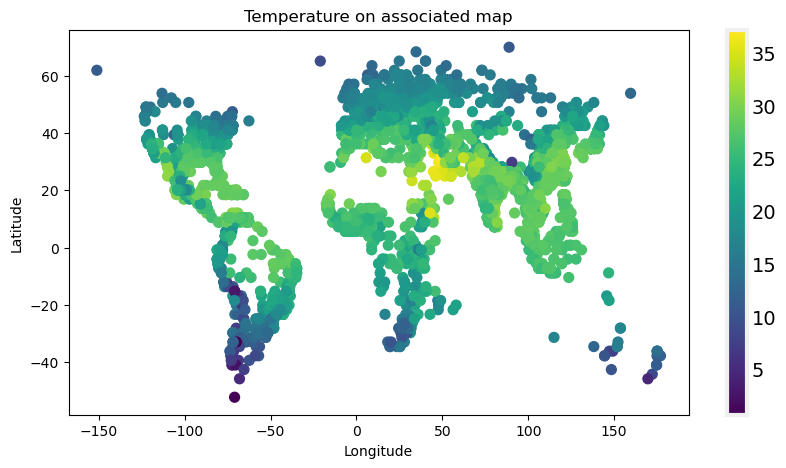

In [25]:
## Visualization of Temperatures across various Latitudes and Longitudes

temps_unique = tempdf.drop_duplicates(subset=['City', 'Country', 'Latitude', 'Longitude'], keep='last')
mpl.rcParams.update(mpl.rcParamsDefault)

plt.figure(figsize=(10,5))
plt.scatter(temps_unique["Longitude"], temps_unique["Latitude"], s = 50,c=temps_unique["AverageTemperature"])
plt.title("Temperature on associated map")
plt.xlabel("Longitude", c = "black")
plt.ylabel("Latitude", c = "black")
style.use('fivethirtyeight')
plt.colorbar()
plt.show()

In [26]:
hdidf = pd.read_csv('countries.csv')
hdidf.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [27]:
hdidf.corr()

,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
Population (millions),1.000000,-0.002684,-0.019567,-0.084928,-0.077887,-0.021166,-0.067031,-0.057722,0.013887,-0.068138,-0.045251,-0.070160,0.063246,-0.051211,-0.039241,-0.057650,-0.029374
HDI,-0.002684,1.000000,0.567385,0.092248,0.231070,0.699447,0.209810,0.739086,0.326574,-0.001788,0.018801,0.130843,0.378490,0.077711,-0.113610,0.739072,0.191894
Cropland Footprint,-0.019567,0.567385,1.000000,0.077909,0.437702,0.410321,0.080194,0.587706,0.765081,0.074739,-0.051494,0.076994,0.431885,0.016203,-0.095166,0.587565,0.023205
Grazing Footprint,-0.084928,0.092248,0.077909,1.000000,0.056984,0.125627,-0.055461,0.275093,0.103578,0.696416,0.017368,0.074063,0.087197,0.089739,0.037187,0.275039,-0.029867
Forest Footprint,-0.077887,0.231070,0.437702,0.056984,1.000000,0.194882,-0.041987,0.399892,0.416119,0.086731,0.142985,0.111545,0.457137,0.172636,0.096049,0.400157,0.080528
Carbon Footprint,-0.021166,0.699447,0.410321,0.125627,0.194882,1.000000,0.155634,0.951867,0.118509,-0.041753,0.010415,0.113483,0.224280,0.028757,-0.151582,0.951872,0.306791
Fish Footprint,-0.067031,0.209810,0.080194,-0.055461,-0.041987,0.155634,1.000000,0.193230,-0.061319,-0.065930,0.013243,0.166797,-0.038714,0.025336,-0.011303,0.192969,0.065981
Total Ecological Footprint,-0.057722,0.739086,0.587706,0.275093,0.399892,0.951867,0.193230,1.000000,0.302500,0.093720,0.025955,0.144556,0.356702,0.066580,-0.135312,0.999997,0.282719
Cropland,0.013887,0.326574,0.765081,0.103578,0.416119,0.118509,-0.061319,0.302500,1.000000,0.299930,0.002206,0.092731,0.445291,0.097184,0.039392,0.302457,-0.132391
Grazing Land,-0.068138,-0.001788,0.074739,0.696416,0.086731,-0.041753,-0.065930,0.093720,0.299930,1.000000,0.094739,0.112493,0.050865,0.198708,0.179973,0.093252,-0.105216


In [28]:
# Looking to get (coordinates and HDI)
# By combining country information based of two datasets 

tempdf['HDI'] = "NaN"

for i in range(len(tempdf)):
    for j in range(len(hdidf)):
        if tempdf['Country'].iloc[i] == hdidf['Country'].iloc[j]:
            tempdf['HDI'].iloc[i] = hdidf['HDI'].iloc[j]


tempdf['Total Ecological Footprint'] = "NaN"

for i in range(len(tempdf)):
    for j in range(len(hdidf)):
        if tempdf['Country'].iloc[i] == hdidf['Country'].iloc[j]:
            tempdf['Total Ecological Footprint'].iloc[i] = hdidf['Total Ecological Footprint'].iloc[j]

geohdidf['Development Tier'] = 'NaN'
for i in range(len(geohdidf)):
    if geohdidf['HDI'].iloc[i] > .8:
        geohdidf['Development Tier'].iloc[i] = 'Very High'
    if geohdidf['HDI'].iloc[i] >= .7 and geohdidf['HDI'].iloc[i] <= .79:
        geohdidf['Development Tier'].iloc[i] = 'High'
    if geohdidf['HDI'].iloc[i] >= .55 and geohdidf['HDI'].iloc[i] <= .7:
        geohdidf['Development Tier'].iloc[i] = 'Medium'
    if geohdidf['HDI'].iloc[i] < .55:
        geohdidf['Development Tier'].iloc[i] = 'Low

#Saving manipulated data frames
geohdidf.to_csv('geohdidata.csv', index=False)
hdidf.to_csv('hdidf.csv', index=False)
tempdf.to_csv('tempdf.csv', index=False)

'tempdf[\'HDI\'] = "NaN"\n\nfor i in range(len(tempdf)):\n    for j in range(len(hdidf)):\n        if tempdf[\'Country\'].iloc[i] == hdidf[\'Country\'].iloc[j]:\n            tempdf[\'HDI\'].iloc[i] = hdidf[\'HDI\'].iloc[j]\n'

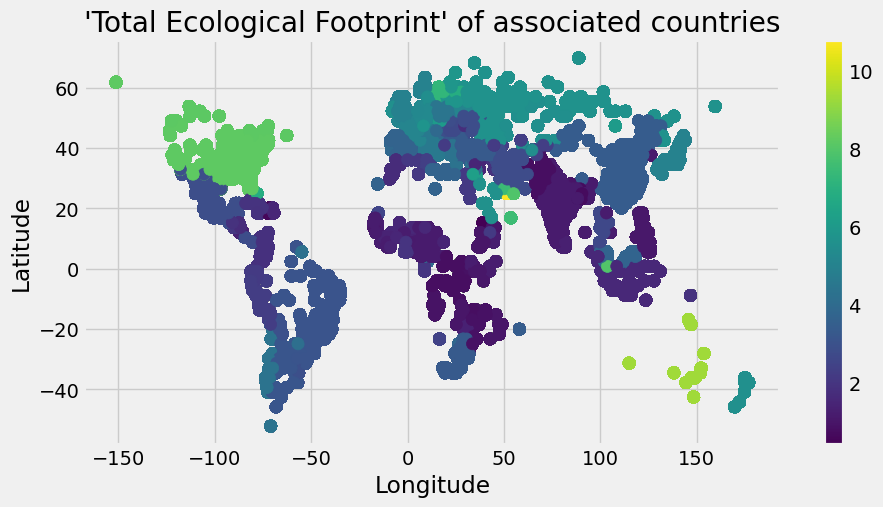

In [53]:
# Visualization of Ecological Footprints across the globe

plt.figure(figsize=(10,5))
plt.scatter(geohdidf["Longitude"], geohdidf["Latitude"], s = 75,c=geohdidf["Total Ecological Footprint"])
plt.title("'Total Ecological Footprint' of associated countries")
plt.xlabel("Longitude", c = "black")
plt.ylabel("Latitude", c = "black")
style.use('fivethirtyeight')
plt.colorbar()
plt.show()

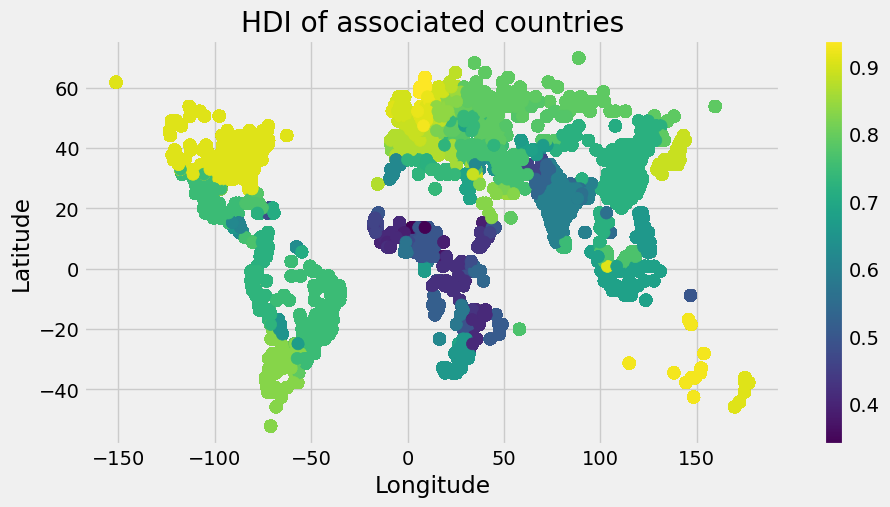

In [54]:
#mpl.rcParams.update(mpl.rcParamsDefault)


#Visualization of HDI across the globe
plt.figure(figsize=(10,5))
plt.scatter(geohdidf["Longitude"], geohdidf["Latitude"], s = 75,c=geohdidf["HDI"])
plt.title("HDI of associated countries")
plt.xlabel("Longitude", c = "black")
plt.ylabel("Latitude", c = "black")
style.use('fivethirtyeight')
plt.colorbar()
plt.show()

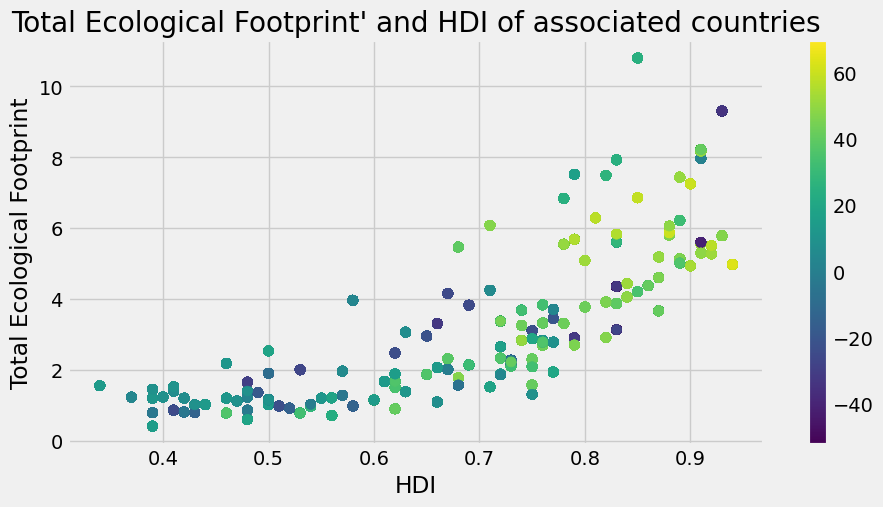

In [55]:
# Relation between Human Development and Total Ecological FootPrint

plt.figure(figsize=(10,5))
plt.scatter(geohdidf["HDI"], geohdidf["Total Ecological Footprint"], s = 50,c=geohdidf['Latitude'])
plt.title("Total Ecological Footprint' and HDI of associated countries")
plt.xlabel("HDI", c = "black")
plt.ylabel("Total Ecological Footprint", c = "black")
style.use('fivethirtyeight')
plt.colorbar()
plt.show()

In [56]:
geohdidf.head()

,City,Country,Latitude,Longitude,dt,AverageTemperature,AverageTemperatureUncertainty,HDI,Total Ecological Footprint,Development Tier
0,A Coruña,Spain,42.59,-8.73,1743-11-01,10.779,1.942,0.87,3.67,Very High
1,Aachen,Germany,50.63,6.34,1743-11-01,6.425,1.628,0.91,5.30,Very High
2,Aalborg,Denmark,57.05,10.33,1743-11-01,6.068,1.737,0.92,5.51,Very High
3,Aberdeen,United Kingdom,57.05,-1.48,1743-11-01,8.758,1.886,0.90,4.94,Very High
4,Aix En Provence,France,44.20,4.47,1743-11-01,7.478,1.866,0.89,5.14,Very High


In [57]:
kmeansdf = geohdidf[['Latitude','Longitude','Total Ecological Footprint']]
kmeansdftarget = geohdidf[['Latitude','Longitude','Total Ecological Footprint','Development Tier']]

In [58]:
from sklearn import cluster
from sklearn.cluster import KMeans

# Using KMeans cluster to create distinct geographic clusters of Human Development based on area
# We're mapping the bottom .8 (High, Medium, Low)
kmeans = KMeans(n_clusters = 3)
kmeans.fit(kmeansdf)

KMeans(n_clusters=3)

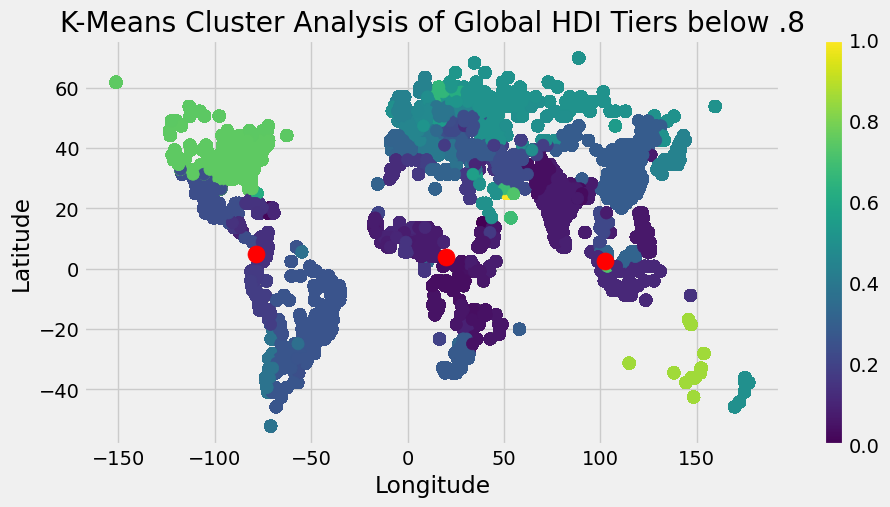

In [59]:
# Graphing KMeans cluster

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
pred_kmeans = kmeans.fit_predict(kmeansdf)

plt.figure(figsize=(10,5))
plt.scatter(kmeansdf['Longitude'],kmeansdf['Latitude'], s = 75, c = kmeansdf['Total Ecological Footprint'])

plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=150,c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Cluster Analysis of Global HDI Tiers below .8')
plt.colorbar()
#1:0 #4

###### The KMeans Cluster above maps to the bottom .8 of the Development Tiers (low tier, medium tier, high tier) by the geographic area and the Total Ecological Footprint.

The color of the graph which was our desired feature showcases these areas to have low total Ecological Footprint. 

###### Comparing this with the "HDI of Associated Countries" graph, we see that areas with the lowest HDI tend to have the lowest total Ecological Footprint while areas with the highest HDI tend to have a higher total Ecological Footprint

## Sources and Citations of material:

1. GISTEMP Team, 2022: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 20YY-MM-DD at https://data.giss.nasa.gov/gistemp/.

2. Berkley Earth. 2017. Climate Change Earth Surface Temperature Data, version 2. Retrieved 05/31/2022 from http://berkeleyearth.org/data/

3. Vivek, 2020, Environmental Impact of Food Production, version 1, Retrieved 05/31/2022 from https://www.kaggle.com/datasets/selfvivek/environment-impact-of-food-production

4. UCI Machine Learning, 2016, Forest Cover Type Dataset, version 1. Retrieved 05/31/2022 from https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset

5. Global Footprint Network 2017, 2016 Global Ecological Footprint,version 1, Retrieved 05/31/2022 from https://www.kaggle.com/datasets/footprintnetwork/ecological-footprint

6. Chandran, K.P.Vipin & Sandhya, P. (2013). Climate Change and Human Development: A Pragmatic Approach. 

7. FAO. (2006). Livestock's long shadow: Environmental issues and options. 

8. Environmental Protection Agency. (n.d.). Climate Change Indicators in the United States. EPA. Retrieved June 7, 2022, from https://www.epa.gov/climate-indicators 